In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import datetime
current_date = datetime.date.today().strftime('%Y-%m-%d')
print(current_date)

2022-06-01


In [3]:
# yyy-mm-dd
start = '2010-01-01'
end = current_date

In [4]:
df = data.DataReader('AAPL', 'yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-24,141.970001,137.330002,140.809998,140.360001,104132700.0,140.360001
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
2022-05-27,149.679993,145.259995,145.389999,149.639999,90796900.0,149.639999
2022-05-31,150.660004,146.839996,149.070007,148.839996,93971235.0,148.839996


In [6]:
df=df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
...,...,...,...,...,...,...,...
3120,2022-05-24,141.970001,137.330002,140.809998,140.360001,104132700.0,140.360001
3121,2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
3122,2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
3123,2022-05-27,149.679993,145.259995,145.389999,149.639999,90796900.0,149.639999


In [7]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


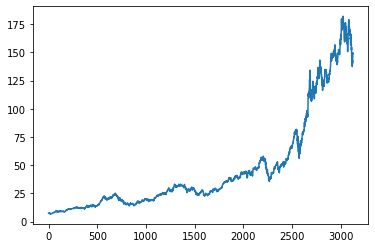

In [8]:
plt.plot(df.Close)

In [9]:
#MOving Avg
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3120    164.7439
3121    164.3734
3122    163.9911
3123    163.6905
3124    163.4297
Name: Close, Length: 3125, dtype: float64

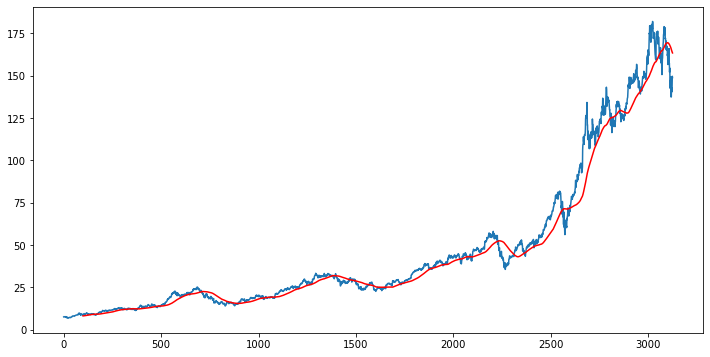

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3120    159.53205
3121    159.50665
3122    159.49625
3123    159.50000
3124    159.49870
Name: Close, Length: 3125, dtype: float64

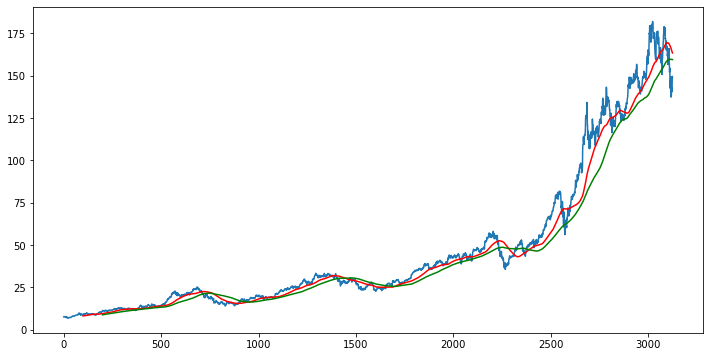

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(3125, 5)

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2187, 1)
(938, 1)


In [15]:
data_training

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
2182,56.907501
2183,57.090000
2184,56.717499
2185,55.775002


In [16]:
# Scale down the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
# transform the data into array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.99258424],
       [0.97382101],
       [0.9648624 ]])

In [18]:
data_training_array.shape

(2187, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [23]:
# converting the array to numpy array for the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[[0.01328146],
        [0.01561354],
        [0.01587662],
        ...,
        [0.03574197],
        [0.03889878],
        [0.03780386]],

       [[0.01561354],
        [0.01587662],
        [0.01345211],
        ...,
        [0.03889878],
        [0.03780386],
        [0.03701464]],

       [[0.01587662],
        [0.01345211],
        [0.01317481],
        ...,
        [0.03780386],
        [0.03701464],
        [0.04358427]],

       ...,

       [[0.73308351],
        [0.7385085 ],
        [0.75055282],
        ...,
        [0.98342658],
        [0.99636681],
        [1.        ]],

       [[0.7385085 ],
        [0.75055282],
        [0.74856198],
        ...,
        [0.99636681],
        [1.        ],
        [0.99258424]],

       [[0.75055282],
        [0.74856198],
        [0.72347794],
        ...,
        [1.        ],
        [0.99258424],
        [0.97382101]]])

ML model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
          
          

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
          
          

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          


#model.add(LSTM(units = 150, activation = 'relu', return_sequences=True))
#model.add(Dropout(0.6))

          
model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
66/66 [==============================] - 28s 294ms/step - loss: 0.0263
Epoch 2/50
66/66 [==============================] - 21s 314ms/step - loss: 0.0052
Epoch 3/50
66/66 [==============================] - 20s 302ms/step - loss: 0.0051
Epoch 4/50
66/66 [==============================] - 20s 297ms/step - loss: 0.0047
Epoch 5/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0050
Epoch 6/50
66/66 [==============================] - 20s 299ms/step - loss: 0.0036
Epoch 7/50
66/66 [==============================] - 19s 291ms/step - loss: 0.0034
Epoch 8/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0036
Epoch 9/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0033
Epoch 10/50
66/66 [==============================] - 19s 290ms/step - loss: 0.0033
Epoch 11/50
66/66 [==============================] - 20s 308ms/step - loss: 0.0032
Epoch 12/50
66/66 [==============================] - 21s 322ms/step - loss: 0.0029
Epoch 13/50
6

In [28]:
model.save('keras_model.h5')

In [29]:
data_training.tail(100)

,Close
2087,44.459999
2088,43.200001
2089,41.430000
2090,41.310001
2091,40.735001
...,...
2182,56.907501
2183,57.090000
2184,56.717499
2185,55.775002


In [30]:
data_testing.head()

,Close
2187,54.582500
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999


In [31]:
# For predicting the values for testing datas we need the value of previous 100 days, and those are in the last 100 data of our training dataset
past_100_days = data_training.tail(100)


final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\One Touch\AppData\Local\Temp\ipykernel_10220\1448009641.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [32]:
final_df

,Close
0,44.459999
1,43.200001
2,41.430000
3,41.310001
4,40.735001
...,...
1033,140.360001
1034,140.520004
1035,143.779999
1036,149.639999


In [33]:
input_data = scaler.fit_transform(final_df)

In [34]:
input_data.shape

(1038, 1)

In [35]:
x_test = []
y_test = []

In [36]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(938, 100, 1)
(938,)


In [38]:
# Making prediction

y_predicted = model.predict(x_test)

30/30 [==============================] - 3s 84ms/step


In [39]:
y_predicted.shape

(938, 1)

In [40]:
type(y_predicted)

numpy.ndarray

In [41]:
y_test.shape

(938,)

In [42]:
y_test

array([0.12996501, 0.13938723, 0.13464199, 0.14375694, 0.13937014,
       0.1291969 , 0.1298114 , 0.13003328, 0.13286677, 0.12882138,
       0.13416403, 0.13655373, 0.13353247, 0.14126483, 0.14261331,
       0.14520781, 0.1486558 , 0.15341813, 0.14645388, 0.14013825,
       0.13925067, 0.14454211, 0.12660237, 0.12334215, 0.13641717,
       0.1283093 , 0.13648544, 0.13484681, 0.12602203, 0.13163779,
       0.13392506, 0.13747546, 0.12443458, 0.13247419, 0.12649996,
       0.11956987, 0.1213792 , 0.13086968, 0.13660494, 0.1114449 ,
       0.10139113, 0.10511224, 0.115661  , 0.11316891, 0.10630708,
       0.08872578, 0.08541435, 0.07614578, 0.08401469, 0.08763335,
       0.07454126, 0.05938379, 0.05904241, 0.05137833, 0.05535546,
       0.05470684, 0.06614321, 0.06377059, 0.06211488, 0.07276608,
       0.0588888 , 0.05552616, 0.04489204, 0.04678673, 0.04513101,
       0.04593327, 0.04909106, 0.03975419, 0.03712555, 0.0407613 ,
       0.03191943, 0.02498933, 0.0145771 , 0.00792012, 0.02556

In [43]:
y_predicted

array([[0.18290663],
       [0.18468353],
       [0.18627484],
       [0.187635  ],
       [0.18878123],
       [0.1897317 ],
       [0.1904588 ],
       [0.190936  ],
       [0.19115248],
       [0.19113186],
       [0.19088385],
       [0.19046551],
       [0.18996048],
       [0.18942975],
       [0.1889599 ],
       [0.1886298 ],
       [0.18850599],
       [0.18864232],
       [0.18907925],
       [0.18978323],
       [0.19068034],
       [0.19167423],
       [0.19269723],
       [0.19361474],
       [0.19428754],
       [0.19466853],
       [0.1947229 ],
       [0.19448252],
       [0.19400916],
       [0.19333053],
       [0.19249569],
       [0.19158086],
       [0.19067818],
       [0.18979593],
       [0.18896344],
       [0.18817535],
       [0.18738382],
       [0.18655166],
       [0.18570982],
       [0.18493682],
       [0.1841794 ],
       [0.18332168],
       [0.18227758],
       [0.18105184],
       [0.17967731],
       [0.17817035],
       [0.17648092],
       [0.174

In [44]:
# Now we have to scale up the values
scaler.scale_       #to find the scaling factor

array([0.00682769])

In [45]:
scale_factor = 1/0.00682769

In [46]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
# plotting the predicted and the original value

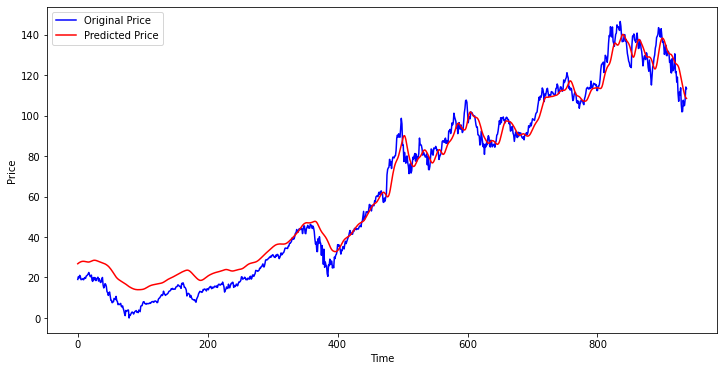

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()